## Porblem Statement
To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores, what is probability ( basically i have done a YES/NO scenario ) of gaining admission into a particular school. All those folks who are preparing for MS, might point out this question, from where did you get SOP & LOR scores. These aren’t public figures ? I mean yes, it might not be public, but dont you think universities might be grading these applications on some scale of rating so that the scores can be standardized. Hence the SOP, LOR scores.

## Dataset
This dataset is created for prediction of graduate admissions and the dataset link is below:

Features in the dataset:

GRE Scores (290 to 340)

TOEFL Scores (92 to 120)

University Rating (1 to 5)

Statement of Purpose (1 to 5)

Letter of Recommendation Strength (1 to 5)

Undergraduate CGPA (6.8 to 9.92)

Research Experience (Yes or No)

Chance of Admit (0.34 to 0.97)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/fakharvsf/Grad_Admission_Pridctions/main/Admission_Prediction1.csv")
df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,Yes,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,Yes,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,Yes,0.72
3,4,322.0,110.0,3,3.5,2.5,8.67,Yes,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,No,0.65


In [4]:
# dropping unnecessary columns
df.drop('Serial_No.', axis=1, inplace=True)

In [5]:
# calculating duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())

True


In [6]:
# list all duplicate rows
print(df[dups])

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA Research  \
170      311.0         99.0                  2  2.5  3.0  7.98       No   
214      338.0        120.0                  4  5.0  5.0  9.66      Yes   
235      312.0        107.0                  2  2.5  3.5  8.27       No   
375      324.0        110.0                  3  3.5  3.0  9.22      Yes   
483      318.0        103.0                  3  4.0  4.5  8.49      Yes   

     Chance_of_Admit  
170             0.65  
214             0.95  
235             0.69  
375             0.89  
483             0.71  


In [7]:
# deleting duplicate rows
df1 = df.drop_duplicates()
print(df.shape)
print(df1.shape)

(505, 8)
(500, 8)


In [8]:
# dealing with categorical data
df=pd.get_dummies(df)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Research_No,Research_Yes
0,337.0,118.0,4,4.5,4.5,9.65,0.92,0,1
1,324.0,107.0,4,4.0,4.5,8.87,0.76,0,1
2,316.0,104.0,3,3.0,3.5,8.00,0.72,0,1
3,322.0,110.0,3,3.5,2.5,8.67,0.80,0,1
4,314.0,103.0,2,2.0,3.0,8.21,0.65,1,0


In [9]:
df['Research_No'] = df['Research_No'].astype(float, errors = 'raise')
df['Research_Yes'] = df['Research_Yes'].astype(float, errors = 'raise')

In [10]:
# getting detail information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          488 non-null    float64
 1   TOEFL_Score        503 non-null    float64
 2   University_Rating  505 non-null    int64  
 3   SOP                505 non-null    float64
 4   LOR                505 non-null    float64
 5   CGPA               505 non-null    float64
 6   Chance_of_Admit    505 non-null    float64
 7   Research_No        505 non-null    float64
 8   Research_Yes       505 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.6 KB


In [11]:
# getting general statistics of the data
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Research_No,Research_Yes
count,488.000000,503.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,316.627049,107.170974,3.110891,3.375248,3.487129,8.577901,0.722297,0.439604,0.560396
std,11.345256,6.087558,1.140689,0.990671,0.924926,0.605166,0.141049,0.496831,0.496831
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.630000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,0.720000,0.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,0.820000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000,1.000000,1.000000


In [12]:
# checking missing values
df.isnull().sum()

GRE_Score            17
TOEFL_Score           2
University_Rating     0
SOP                   0
LOR                   0
CGPA                  0
Chance_of_Admit       0
Research_No           0
Research_Yes          0
dtype: int64

In [13]:
# filling missing values of GRE & TOEFL Score with mean

df['GRE_Score'] = df['GRE_Score'].fillna(df['GRE_Score'].mean())
df['TOEFL_Score'] = df['TOEFL_Score'].fillna(df['TOEFL_Score'].mean())
# df.dropna(axis=0, inplace=True)

In [14]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Research_No,Research_Yes
0,337.0,118.0,4,4.5,4.5,9.65,0.92,0.0,1.0
1,324.0,107.0,4,4.0,4.5,8.87,0.76,0.0,1.0
2,316.0,104.0,3,3.0,3.5,8.00,0.72,0.0,1.0
3,322.0,110.0,3,3.5,2.5,8.67,0.80,0.0,1.0
4,314.0,103.0,2,2.0,3.0,8.21,0.65,1.0,0.0


In [15]:
df.shape

(505, 9)

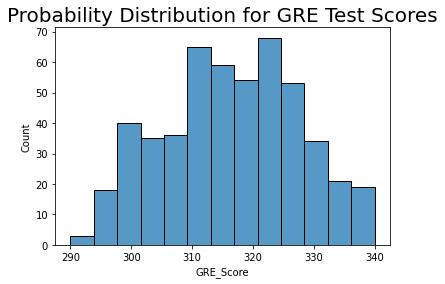

In [17]:
# Probability Distribution
sns.histplot(df['GRE_Score']).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

# **Univariate Analysis**

In [21]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Chance_of_Admit', 'Research_No', 'Research_Yes'],
      dtype='object')

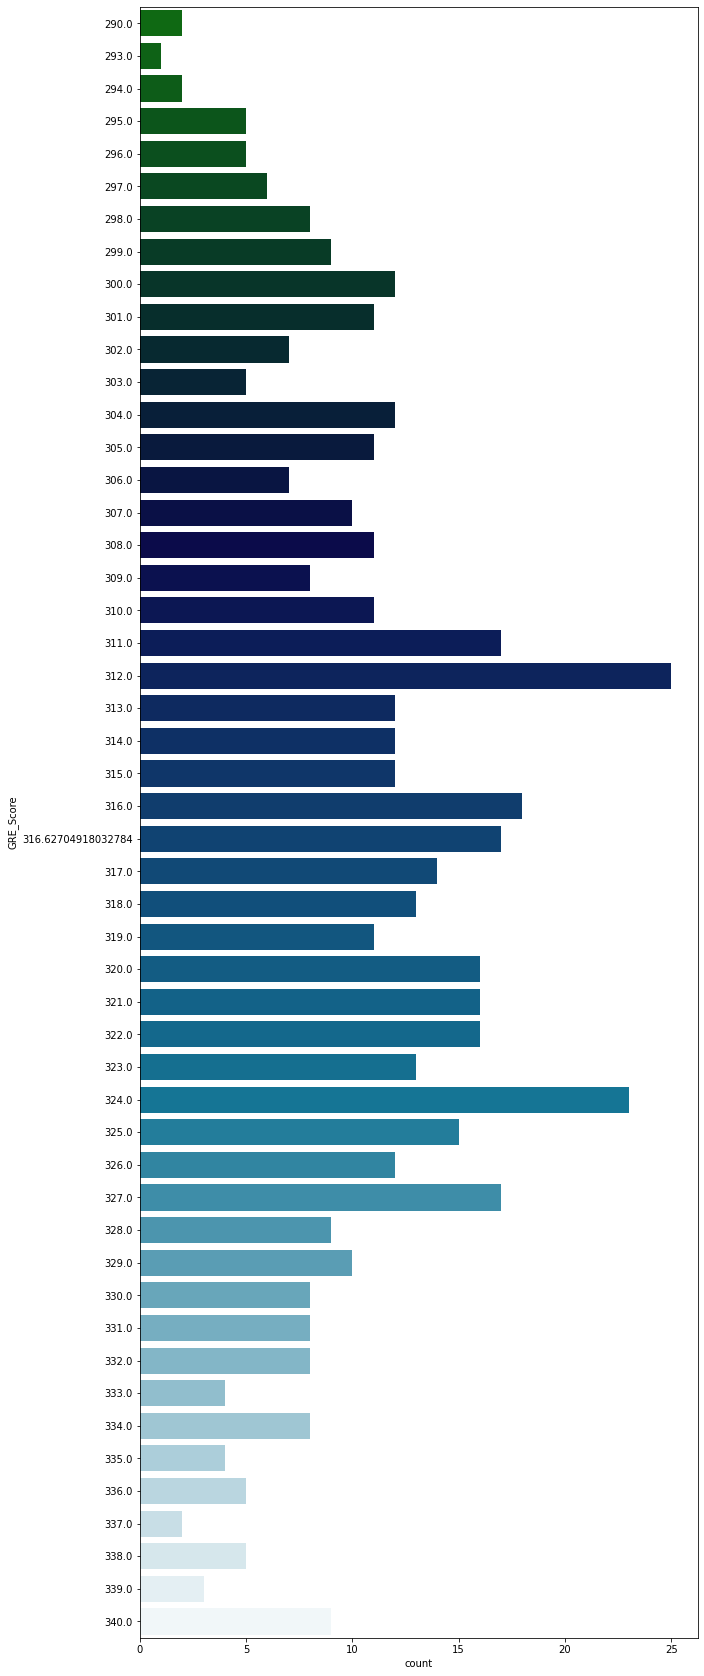

In [27]:
plt.figure(figsize=(10,30))
sns.countplot(y='GRE_Score',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


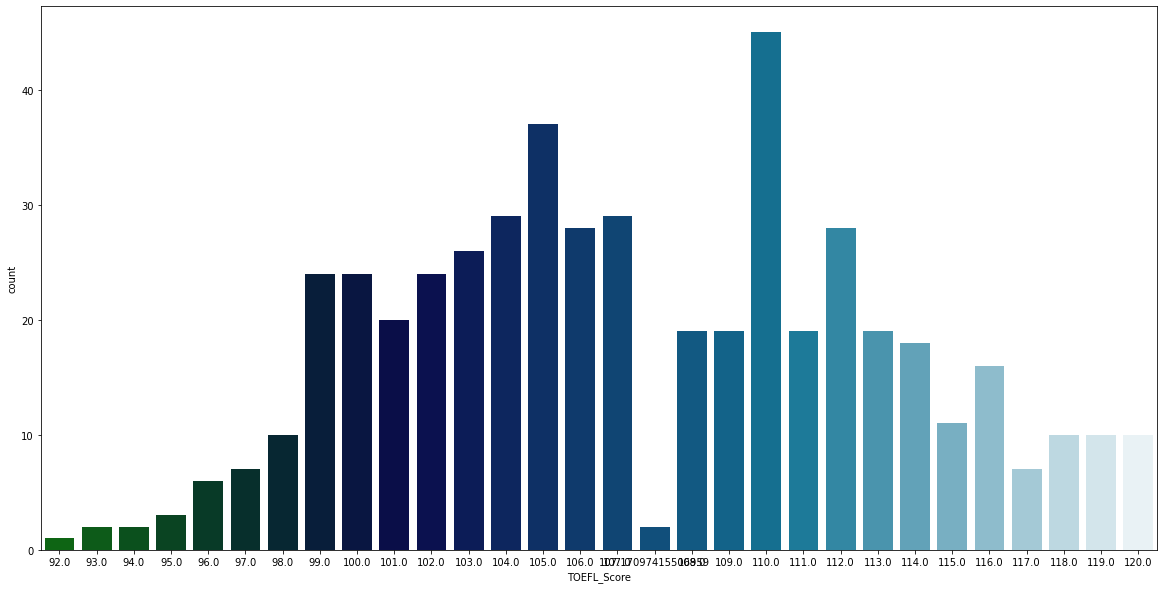

In [31]:
plt.figure(figsize=(20,10))
sns.countplot('TOEFL_Score',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


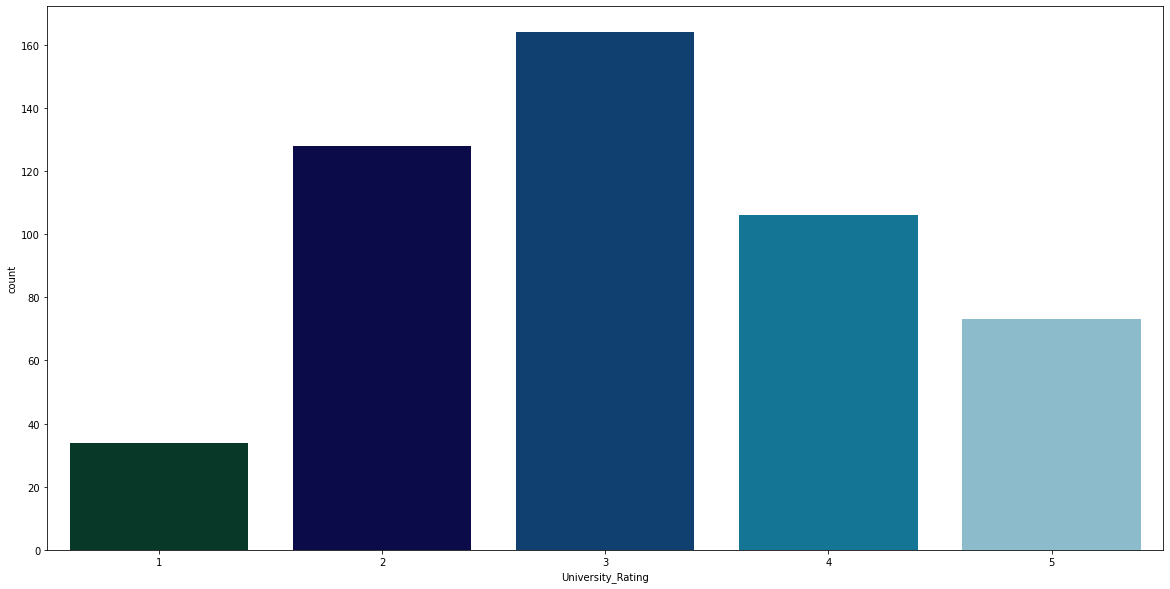

In [32]:
plt.figure(figsize=(20,10))
sns.countplot('University_Rating',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


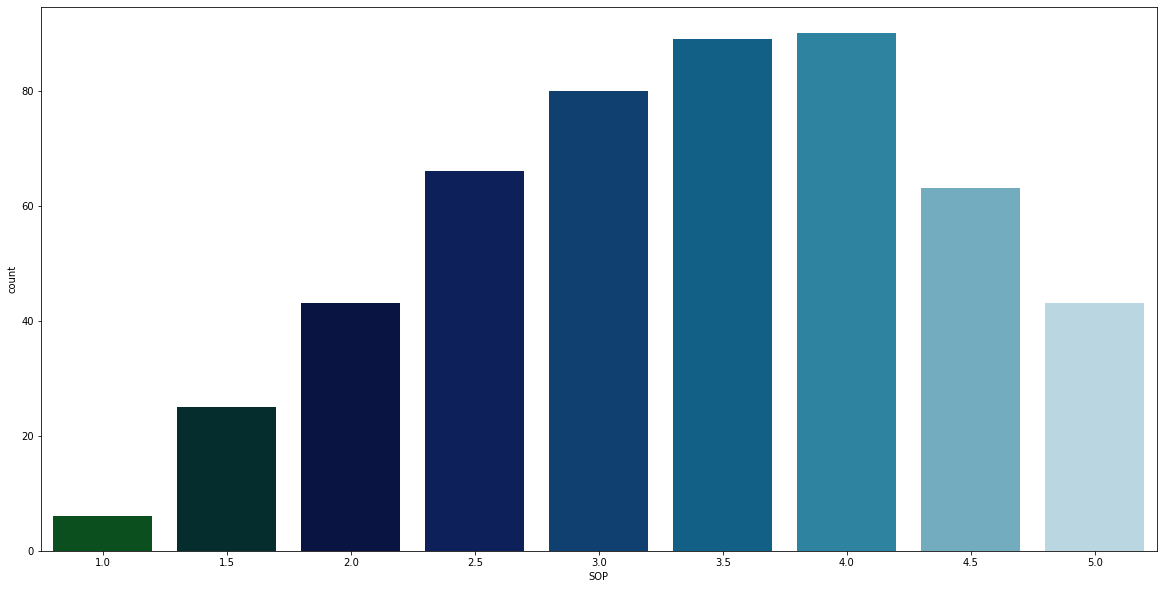

In [33]:
# SOP
plt.figure(figsize=(20,10))
sns.countplot('SOP',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


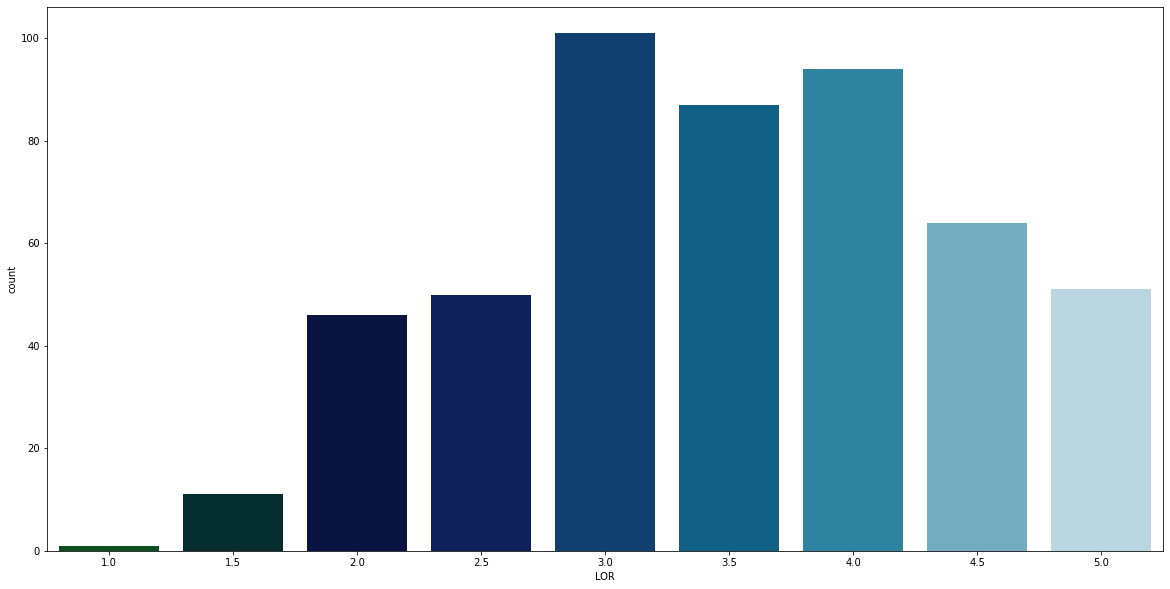

In [34]:
# LOR

plt.figure(figsize=(20,10))
sns.countplot('LOR',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


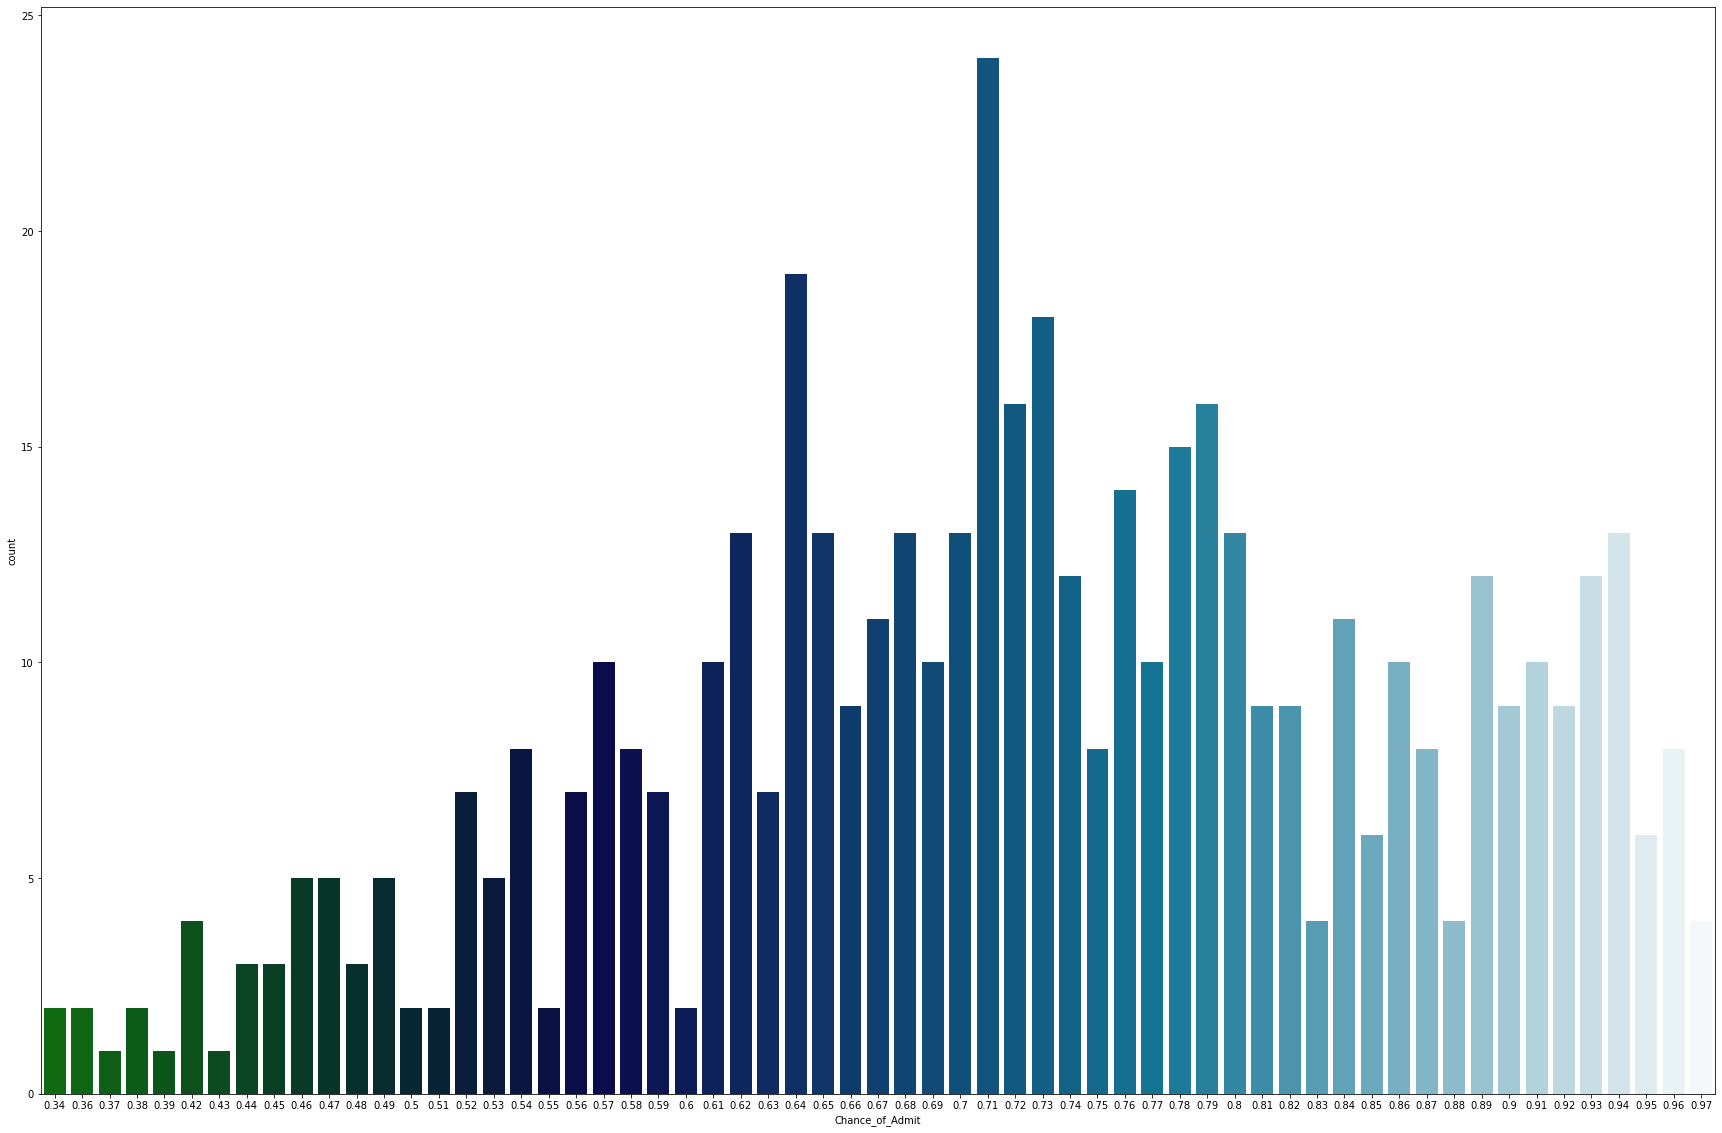

In [49]:
# Chance_of_Admit
plt.figure(figsize=(30,20))
sns.countplot('Chance_of_Admit',data=df,palette='ocean')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


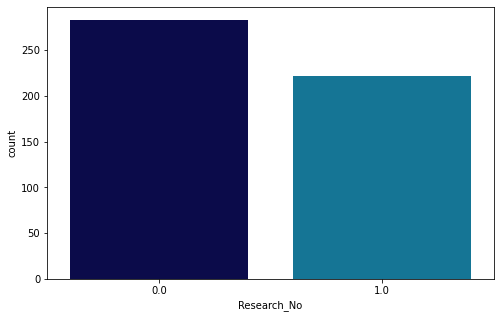

In [48]:
# Research_No
plt.figure(figsize=(8,5))
sns.countplot('Research_No',data=df,palette='ocean')

# **Bivariate Analysis**

In [54]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Chance_of_Admit', 'Research_No', 'Research_Yes'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


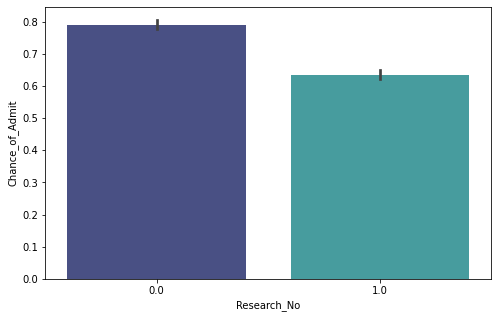

In [46]:
plt.figure(figsize=(8,5))
sns.barplot('Research_No','Chance_of_Admit',data=df,palette='mako')


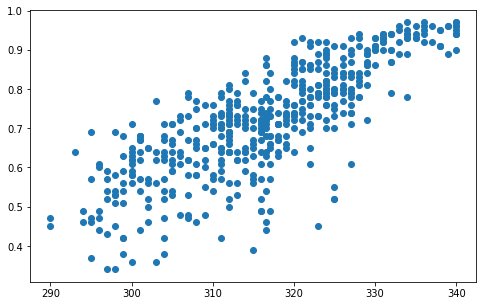

In [55]:
plt.figure(figsize=(8,5))
plt.scatter('GRE_Score','Chance_of_Admit',data=df)
plt.xlabel('GRE_Score')
plt.ylabel('Chance_of_Admit')

Text(0, 0.5, 'Chance_of_Admit')

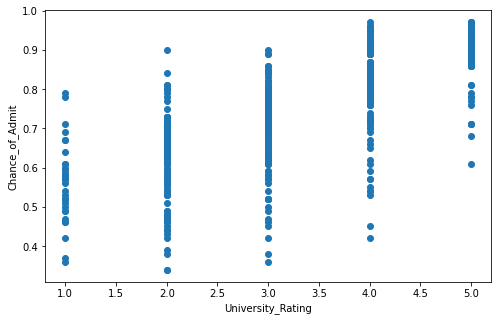

In [59]:
plt.figure(figsize=(8,5))
plt.scatter('University_Rating','Chance_of_Admit',data=df)
plt.xlabel('University_Rating')
plt.ylabel('Chance_of_Admit')

Text(0, 0.5, 'Chance of Admit')

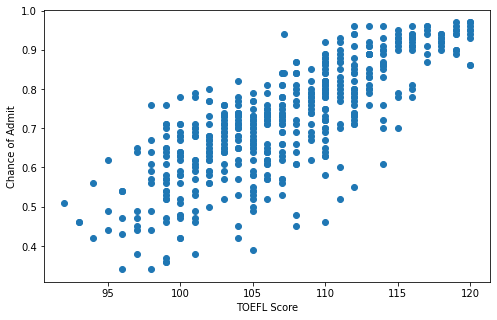

In [61]:
plt.figure(figsize=(8,5))
plt.scatter('TOEFL_Score','Chance_of_Admit',data=df)
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

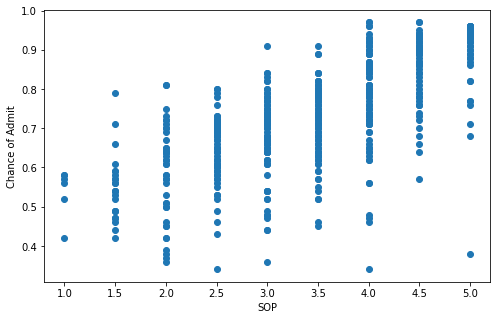

In [63]:
plt.figure(figsize=(8,5))
plt.scatter('SOP','Chance_of_Admit',data=df)
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')

# **Multivariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


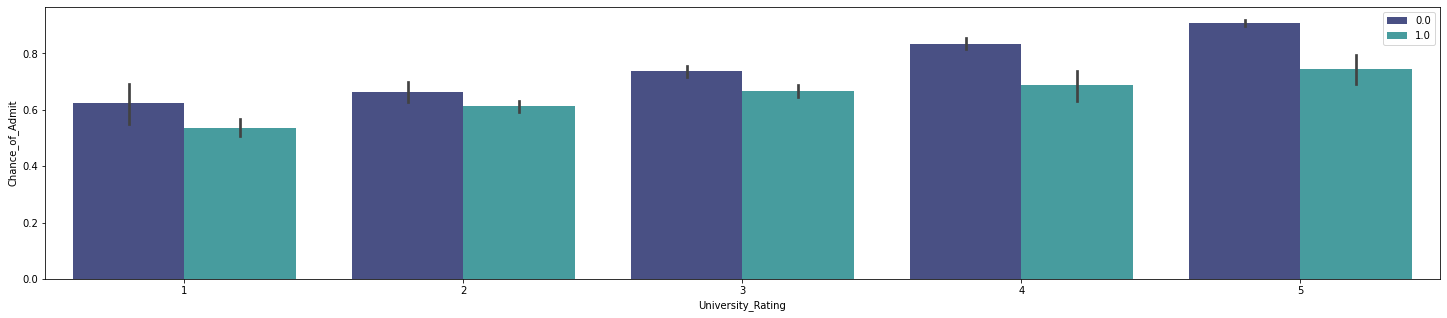

In [67]:
plt.figure(figsize=(25,5))
sns.barplot('University_Rating','Chance_of_Admit',hue='Research_No',data=df,palette='mako')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SOP')

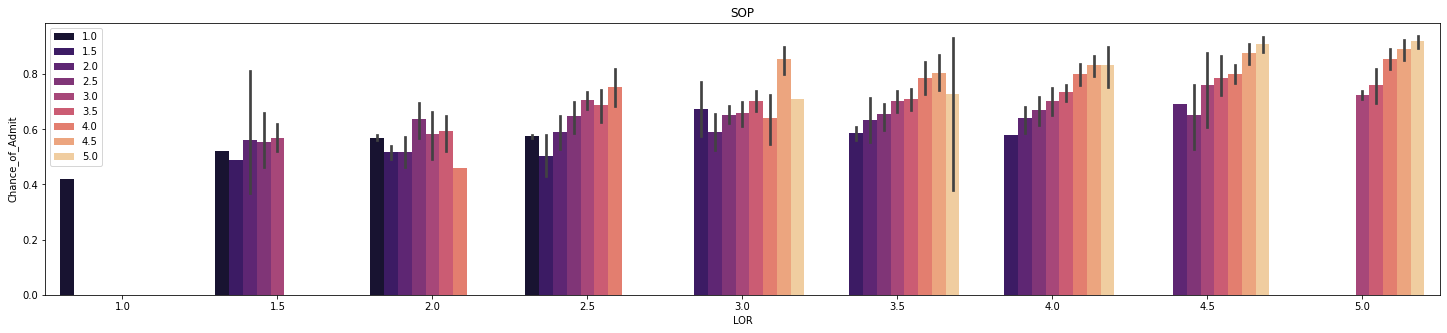

In [74]:
plt.figure(figsize=(25,5))
sns.barplot('LOR','Chance_of_Admit',hue='SOP',data=df,palette='magma')
plt.legend()
plt.title('SOP')

Text(0.5, 1.0, 'Correlation Factors Heat Map')

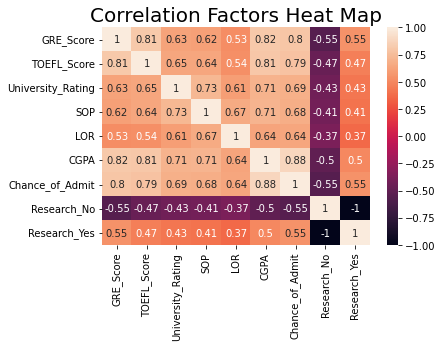

In [75]:
## Correlation coeffecients heatmap
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [76]:
# Barplot for the distribution of the University Rating
University_Rating = df.groupby(['University_Rating']).count()
# sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='20')
# plt.show()

In [77]:
X = df.drop(['Chance_of_Admit'], axis=1)
y = df['Chance_of_Admit']

In [78]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Chance_of_Admit      0
Research_No          0
Research_Yes         0
dtype: int64

In [79]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          505 non-null    float64
 1   TOEFL_Score        505 non-null    float64
 2   University_Rating  505 non-null    int64  
 3   SOP                505 non-null    float64
 4   LOR                505 non-null    float64
 5   CGPA               505 non-null    float64
 6   Chance_of_Admit    505 non-null    float64
 7   Research_No        505 non-null    float64
 8   Research_Yes       505 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.6 KB


In [81]:
df['TOEFL_Score'] = df['TOEFL_Score'].astype(float, errors = 'raise')
df['GRE_Score'] = df['GRE_Score'].astype(float, errors = 'raise')

In [82]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,337.0,118.0,4,4.5,4.5,9.65,0.0,1.0
1,324.0,107.0,4,4.0,4.5,8.87,0.0,1.0
2,316.0,104.0,3,3.0,3.5,8.00,0.0,1.0
3,322.0,110.0,3,3.5,2.5,8.67,0.0,1.0
4,314.0,103.0,2,2.0,3.0,8.21,1.0,0.0


In [83]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE_Score', 'TOEFL_Score']] = scaler.fit_transform(X[['CGPA','GRE_Score', 'TOEFL_Score']])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          505 non-null    float64
 1   TOEFL_Score        505 non-null    float64
 2   University_Rating  505 non-null    int64  
 3   SOP                505 non-null    float64
 4   LOR                505 non-null    float64
 5   CGPA               505 non-null    float64
 6   Chance_of_Admit    505 non-null    float64
 7   Research_No        505 non-null    float64
 8   Research_Yes       505 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.6 KB


In [90]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Chance_of_Admit', 'Research_No', 'Research_Yes'],
      dtype='object')

In [96]:
features=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research_No', 'Research_Yes']

In [92]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
#### Linear Regression (All Features)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [94]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
90,0.64,0.64
97,0.86,0.86
477,0.67,0.67
340,0.94,0.94
395,0.71,0.71


In [98]:
coef2 = pd.Series(lr.coef_,features).sort_values()
coef2

Research_No         -0.011320
SOP                  0.001688
University_Rating    0.005794
Research_Yes         0.011320
LOR                  0.017945
TOEFL_Score          0.019067
GRE_Score            0.019642
CGPA                 0.071317
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


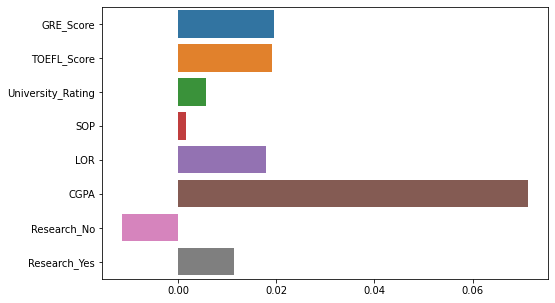

In [99]:
plt.figure(figsize=(8,5))
sns.barplot(lr.coef_,features)

In [89]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_pred))

r_square score:  0.7943215063689386


In [101]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.042546985715687984
mean squared error: 0.0036673741697164706


In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test) 
print("r_square score: ", r2_score(y_test, y_pred_rfr))

r_square score:  0.7434332301540391


In [104]:
coef3 = pd.Series(rfr.feature_importances_, features).sort_values(ascending=False)
coef3

CGPA                 0.821467
GRE_Score            0.059387
TOEFL_Score          0.040281
SOP                  0.027059
LOR                  0.025128
University_Rating    0.016675
Research_Yes         0.005354
Research_No          0.004649
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


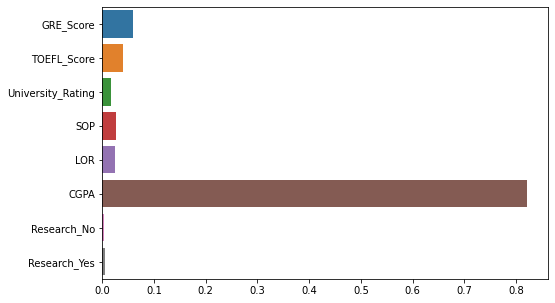

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(rfr.feature_importances_,features)

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test) 
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_pred_dtr))

r_square score:  0.4951618623735178


In [107]:
from sklearn.model_selection  import cross_val_score
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [108]:
cross_val(lr,LinearRegression(),X,y,5)

LinearRegression() Scores:
0.67
0.79
0.87
0.82
0.9
Average LinearRegression() score: 0.81


In [112]:
cross_val(dtr,DecisionTreeRegressor(),X,y,5)

DecisionTreeRegressor() Scores:
0.59
0.42
0.52
0.55
0.57
Average DecisionTreeRegressor() score: 0.53


In [113]:
cross_val(rfr,RandomForestRegressor(),X,y,5)

RandomForestRegressor() Scores:
0.65
0.73
0.88
0.78
0.85
Average RandomForestRegressor() score: 0.78


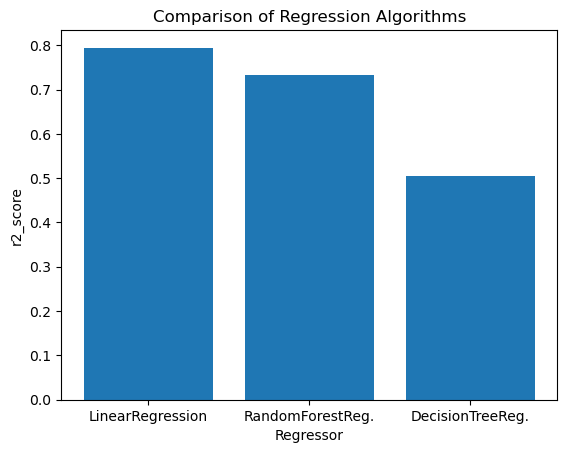

In [ ]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_pred_rfr),r2_score(y_test,y_pred_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

LinearRegression Model clearly did best! :)